In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [110]:
df=pd.read_excel("RBI DATA.xlsx")

In [111]:
df

,States_Union Territories,Year,INCOME,LITERACY,POPULATION,SEX_Ratio,UNEMP,Poverty,Total Ipc Crimes
0,Andaman and Nicobar Islands,2001,25047,81.30,356.000,846,34.0,20.99,658
1,Andhra Pradesh,2001,17195,60.47,76210.000,978,8.0,15.77,130089
2,Arunachal Pradesh,2001,15260,54.34,1098.000,893,5.0,33.47,2342
3,Assam,2001,12803,63.25,26656.000,935,39.0,36.09,36877
4,Bihar,2001,6415,47.00,82999.000,919,18.0,42.60,88432
...,...,...,...,...,...,...,...,...,...
91,Tamil Nadu,2021,212174,80.10,72147.030,995,4.1,4.89,322852
92,Tripura,2021,119789,87.20,3673.917,961,17.0,16.65,4133
93,Uttar Pradesh,2021,61666,67.70,199812.341,908,4.0,37.79,357905
94,Uttarakhand,2021,182698,78.80,10086.292,963,0.5,17.72,15704


In [112]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [113]:
df.columns

Index(['States_Union Territories', 'Year', 'INCOME', 'LITERACY', 'POPULATION',
       'SEX_Ratio', 'UNEMP', 'Poverty', 'Total Ipc Crimes'],
      dtype='object')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   States_Union Territories  96 non-null     object        
 1   Year                      96 non-null     datetime64[ns]
 2   INCOME                    96 non-null     int64         
 3   LITERACY                  96 non-null     float64       
 4   POPULATION                96 non-null     float64       
 5   SEX_Ratio                 96 non-null     int64         
 6   UNEMP                     96 non-null     float64       
 7   Poverty                   96 non-null     float64       
 8   Total Ipc Crimes          96 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 6.9+ KB


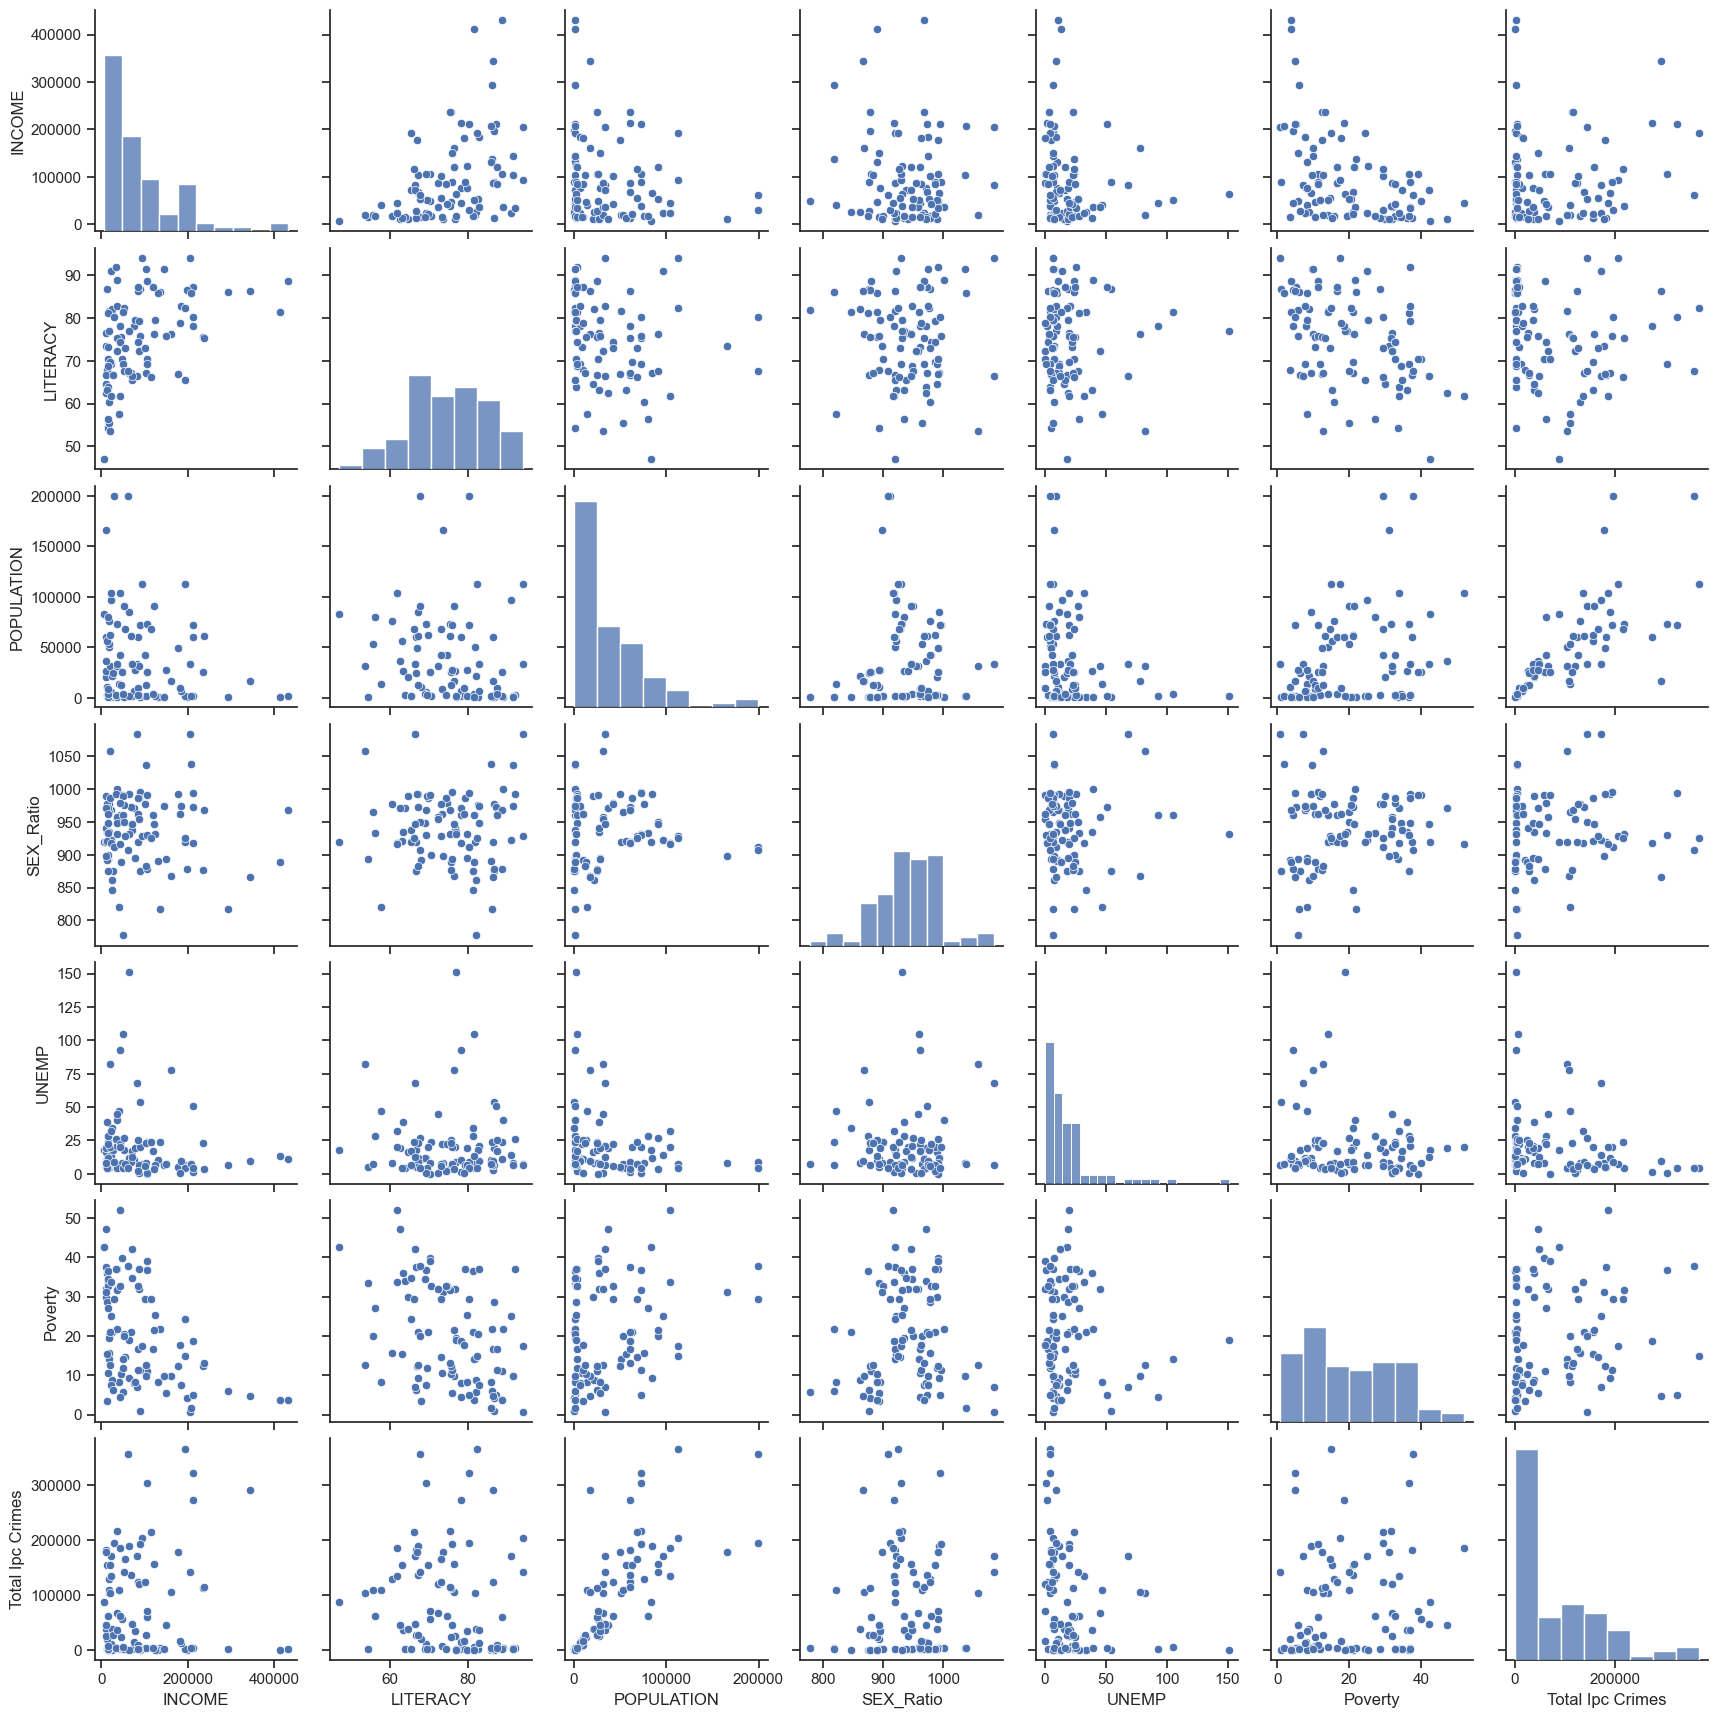

In [115]:
# Create a scatter plot matrix using Seaborn's pairplot
sns.set(style="ticks")
sns.pairplot(df)

# Display the plot
plt.show()

In [116]:
# Create dummy variables for the years 2011 and 2021
df["Year_2001"] = (df["Year"] == 2001).astype(int)
df["Year_2011"] = (df["Year"] == 2011).astype(int)
df["Year_2021"] = (df["Year"] == 2021).astype(int)

# Specify independent variables (predictors)
X = df[["Year_2001","Year_2011", "Year_2021", "LITERACY", "POPULATION", "INCOME", 'SEX_Ratio', 'UNEMP', 'Poverty']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Dependent variable
y = df["Total Ipc Crimes"]

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Total Ipc Crimes   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     32.00
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           3.04e-20
Time:                        11:40:36   Log-Likelihood:                -1178.1
No. Observations:                  96   AIC:                             2370.
Df Residuals:                      89   BIC:                             2388.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.041e+04   1.08e+05     -0.188      0.851   -2.36e+05    1.95e+05
Year_2001  -2.928e-07   1.56e-06     -0.188      0.851   -3.38e-06     2.8e-06
Year_2011   1.283e-07   6.81e-07      0.188      0.851   -1.22e-06    1.48e-06
Year_2021   4.576e-10   2.43e-09      0.188      0.851   -4.37e-09    5.28e-09
LITERACY    -922.6475    626.267     -1.473      0.144   -2167.026     321.731
POPULATION     1.7900      0.140     12.792      0.000       1.512       2.068
INCOME         0.2636      0.077      3.421      0.001       0.111       0.417
SEX_Ratio     99.6400    101.518      0.982      0.329    -102.074     301.354
UNEMP        -37.3685    244.409     -0.153      0.879    -523.004     448.267
Poverty     -493.8202    536.967     -0.920      0.360   -1560.763     573.122
==============================================================================
Omnibus:                       19.118   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.653
Skew:                           0.750   Prob(JB):                     6.66e-09
Kurtosis:                       5.677   Cond. No.                     1.60e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.96e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [117]:
# Create a formula for the model
formula = 'Q("Total Ipc Crimes") ~ INCOME +  POPULATION  + LITERACY +  SEX_Ratio  + UNEMP + Poverty + Year'
# Fit the model using the formula
model = ols(formula, data=df).fit()

# Obtain the ANOVA table
anova_table = sm.stats.anova_lm(model,typ=1)

# Print the ANOVA table
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Year,2.0,4.655649e+10,2.327824e+10,8.039991,6.251785e-04
INCOME,1.0,1.096937e+10,1.096937e+10,3.788674,5.482755e-02
POPULATION,1.0,4.891527e+11,4.891527e+11,168.946744,4.297675e-22
LITERACY,1.0,3.486774e+09,3.486774e+09,1.204285,2.754951e-01
SEX_Ratio,1.0,1.986651e+09,1.986651e+09,0.686162,4.097394e-01
UNEMP,1.0,2.823968e+08,2.823968e+08,0.097536,7.555541e-01
Poverty,1.0,4.531560e+09,4.531560e+09,1.565140,2.142681e-01
Residual,87.0,2.518917e+11,2.895307e+09,NaN,NaN


In [118]:
# Extract the sum of squares (sum_sq) for each independent variable.
independent_variables = ['INCOME', 'LITERACY', 'POPULATION', 'SEX_Ratio', 'UNEMP', 'Poverty']
sum_sq_dict = {var: anova_table.loc[var, 'sum_sq'] for var in independent_variables}

# Calculate the VIF for each independent variable.
vif_dict = {var: 1.0 / (1.0 - (sum_sq_dict[var] / anova_table.loc['Residual', 'sum_sq'])) for var in independent_variables}

# Convert the VIF values to a pandas DataFrame for better representation.
vif_df = pd.DataFrame.from_dict(vif_dict, orient='index', columns=['VIF'])
print(vif_df)

                 VIF
INCOME      1.045531
LITERACY    1.014037
POPULATION -1.061665
SEX_Ratio   1.007950
UNEMP       1.001122
Poverty     1.018320


In [119]:
df['States_Union Territories'] = pd.Categorical(df['States_Union Territories'])

In [120]:
# Create a formula for the model
formula = 'Q("Total Ipc Crimes") ~ INCOME + LITERACY + SEX_Ratio + POPULATION + Poverty + Year'

# Fit the model using the formula
model = ols(formula, data=df).fit()

# Obtain the ANOVA table
anova_table = sm.stats.anova_lm(model,typ=1)

# Print the ANOVA table
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Year,2.0,4.655649e+10,2.327824e+10,8.129727,5.756492e-04
INCOME,1.0,1.096937e+10,1.096937e+10,3.830960,5.348353e-02
LITERACY,1.0,3.627911e+10,3.627911e+10,12.670170,6.016685e-04
SEX_Ratio,1.0,4.263645e+06,4.263645e+06,0.001489,9.693062e-01
POPULATION,1.0,4.583428e+11,4.583428e+11,160.072285,1.647314e-21
Poverty,1.0,4.730997e+09,4.730997e+09,1.652260,2.020242e-01
Residual,88.0,2.519747e+11,2.863349e+09,NaN,NaN


In [121]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("Total Ipc Crimes")   R-squared:                       0.688
Model:                               OLS   Adj. R-squared:                  0.664
Method:                    Least Squares   F-statistic:                     27.78
Date:                   Fri, 18 Aug 2023   Prob (F-statistic):           8.88e-20
Time:                           11:40:36   Log-Likelihood:                -1177.3
No. Observations:                     96   AIC:                             2371.
Df Residuals:                         88   BIC:                             2391.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                -4811.5796   1.12e+05     -0.043      0.966   -2.27e+05    2.18e+05
Year[T.Timestamp('2011-01-01 00:00:00')]  1292.4991   1.54e+04      0.084      0.933   -2.93e+04    3.19e+04
Year[T.Timestamp('2021-01-01 00:00:00')]  2.283e+04   2.21e+04      1.031      0.305   -2.12e+04    6.68e+04
INCOME                                       0.1593      0.120      1.333      0.186      -0.078       0.397
LITERACY                                  -847.6329    652.237     -1.300      0.197   -2143.817     448.551
SEX_Ratio                                   83.1429    103.865      0.800      0.426    -123.266     289.552
POPULATION                                   1.7769      0.140     12.713      0.000       1.499       2.055
Poverty                                   -729.6275    567.626     -1.285      0.202   -1857.664     398.409
==============================================================================
Omnibus:                       20.609   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.306
Skew:                           0.841   Prob(JB):                     4.81e-09
Kurtosis:                       5.597   Cond. No.                     2.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
# Create a formula for the model
formula = 'Q("Total Ipc Crimes") ~ INCOME + LITERACY + POPULATION + Poverty + Year'

# Fit the model using the formula
model = ols(formula, data=df).fit()

# Obtain the ANOVA table
anova_table = sm.stats.anova_lm(model,typ=1)

# Print the ANOVA table
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Year,2.0,4.655649e+10,2.327824e+10,8.162672,5.560857e-04
INCOME,1.0,1.096937e+10,1.096937e+10,3.846485,5.297641e-02
LITERACY,1.0,3.627911e+10,3.627911e+10,12.721515,5.844855e-04
POPULATION,1.0,4.563604e+11,4.563604e+11,160.025833,1.362749e-21
Poverty,1.0,4.882851e+09,4.882851e+09,1.712204,1.940687e-01
Residual,89.0,2.538095e+11,2.851792e+09,NaN,NaN


In [123]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("Total Ipc Crimes")   R-squared:                       0.686
Model:                               OLS   Adj. R-squared:                  0.665
Method:                    Least Squares   F-statistic:                     32.44
Date:                   Fri, 18 Aug 2023   Prob (F-statistic):           2.02e-20
Time:                           11:40:37   Log-Likelihood:                -1177.6
No. Observations:                     96   AIC:                             2369.
Df Residuals:                         89   BIC:                             2387.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 7.491e+04   5.11e+04      1.465      0.146   -2.67e+04    1.77e+05
Year[T.Timestamp('2011-01-01 00:00:00')]  3694.3274   1.51e+04      0.245      0.807   -2.63e+04    3.37e+04
Year[T.Timestamp('2021-01-01 00:00:00')]  2.649e+04   2.16e+04      1.226      0.224   -1.65e+04    6.94e+04
INCOME                                       0.1444      0.118      1.225      0.224      -0.090       0.379
LITERACY                                  -872.1019    650.204     -1.341      0.183   -2164.044     419.840
POPULATION                                   1.7696      0.139     12.714      0.000       1.493       2.046
Poverty                                   -741.0120    566.301     -1.309      0.194   -1866.240     384.216
==============================================================================
Omnibus:                       19.017   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.594
Skew:                           0.796   Prob(JB):                     5.07e-08
Kurtosis:                       5.421   Cond. No.                     1.19e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
# Create a formula for the model
formula = 'Q("Total Ipc Crimes") ~   POPULATION + INCOME'

# Fit the model using the formula
model1 = ols(formula, data=df).fit()

# Obtain the ANOVA table
anova_table = sm.stats.anova_lm(model1,typ=1)

# Print the ANOVA table
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
POPULATION,1.0,4.988639e+11,4.988639e+11,174.340290,4.818593e-23
INCOME,1.0,4.388004e+10,4.388004e+10,15.334962,1.715737e-04
Residual,93.0,2.661137e+11,2.861438e+09,NaN,NaN


In [125]:
# Extract the sum of squares (sum_sq) for each independent variable.
independent_variables = [ 'POPULATION','INCOME']
sum_sq_dict = {var: anova_table.loc[var, 'sum_sq'] for var in independent_variables}

# Calculate the VIF for each independent variable.
vif_dict = {var: 1.0 / (1.0 - (sum_sq_dict[var] / anova_table.loc['Residual', 'sum_sq'])) for var in independent_variables}

# Convert the VIF values to a pandas DataFrame for better representation.
vif_df = pd.DataFrame.from_dict(vif_dict, orient='index', columns=['VIF'])
print(vif_df)

                 VIF
POPULATION -1.143345
INCOME      1.197450


In [126]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("Total Ipc Crimes")   R-squared:                       0.671
Model:                               OLS   Adj. R-squared:                  0.664
Method:                    Least Squares   F-statistic:                     94.84
Date:                   Fri, 18 Aug 2023   Prob (F-statistic):           3.54e-23
Time:                           11:40:37   Log-Likelihood:                -1179.9
No. Observations:                     96   AIC:                             2366.
Df Residuals:                         93   BIC:                             2373.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5974.8695   9662.861     -0.618      0.538   -2.52e+04    1.32e+04
POPULATION     1.8000      0.132     13.676      0.000       1.539       2.061
INCOME         0.2507      0.064      3.916      0.000       0.124       0.378
==============================================================================
Omnibus:                       16.955   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.851
Skew:                           0.676   Prob(JB):                     1.21e-07
Kurtosis:                       5.476   Cond. No.                     2.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
# Let's assume your data is stored in a DataFrame called 'data'.
dependent_variable = ['Total Ipc Crimes']
independent_variables =['INCOME', 'LITERACY', 'SEX_Ratio', 'UNEMP', 'Poverty','POPULATION',]

X =df[independent_variables]
y =df[dependent_variable]

In [128]:
def backward_elimination(X, y):
    features = list(X.columns)
    results = []
    
    while len(features) > 0:
        X_temp = X[features]
        X_temp = sm.add_constant(X_temp)
        model = sm.OLS(y, X_temp).fit()
        
        sse = model.ssr
        aic = model.aic
        bic = model.bic
        
        results.append({'Features': ", ".join(features), 'SSE': sse, 'AIC': aic, 'BIC': bic})
        
        if len(features) > 1:
            p_values = model.pvalues.iloc[1:]
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    
    return pd.DataFrame(results)



backward_selection_results = backward_elimination(X, y)
backward_selection_results

,Features,SSE,AIC,BIC
0,"INCOME, LITERACY, SEX_Ratio, UNEMP, Poverty, P...",2.561931e+11,2370.101711,2388.052148
1,"INCOME, LITERACY, SEX_Ratio, Poverty, POPULATION",2.562604e+11,2368.126922,2383.513011
2,"INCOME, LITERACY, SEX_Ratio, POPULATION",2.586293e+11,2367.010277,2379.832018
3,"INCOME, LITERACY, POPULATION",2.611592e+11,2365.944779,2376.202172
4,"INCOME, POPULATION",2.661137e+11,2365.748975,2373.442020
5,POPULATION,3.099938e+11,2378.401305,2383.530001


In [129]:
# Get the residuals from the model
residuals = model.resid

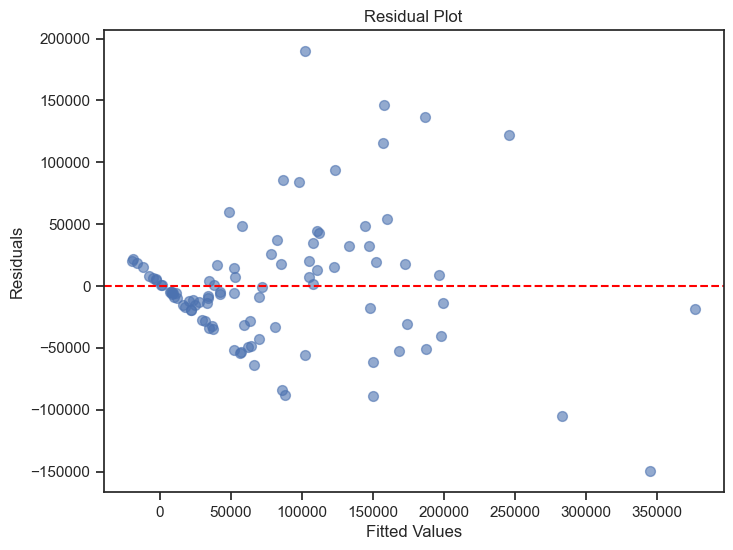

In [130]:
# Step 4: Create the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals, s=50, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

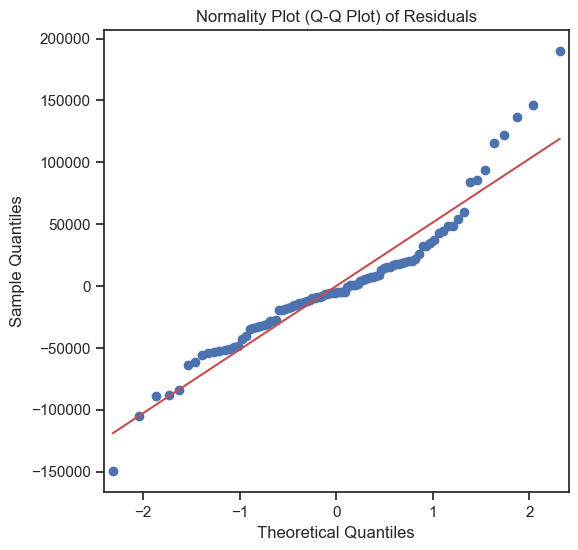

In [131]:
# Normality plot (Q-Q plot) of residuals
fig, ax = plt.subplots(figsize=(6, 6))
sm.qqplot(residuals, line='s', ax=ax)
plt.title('Normality Plot (Q-Q Plot) of Residuals')
plt.show()